In [ ]:
#| default_exp app

In [ ]:
#| export
from fastai.vision.all import *
import timm

/home/average-joe/mambaforge/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
#| export
import gradio as gr

In [ ]:
#| export
learn = load_learner('bird_classifier_resnet18_963.pkl')
categories = learn.dls.vocab

In [ ]:
%matplotlib inline

In [ ]:
#| export
def classify(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

{'canary': 0.006463071797043085,
 'magpie': 5.670467089657905e-06,
 'mockingbird': 2.469691571604926e-05,
 'nightingale': 0.9738429188728333,
 'robin': 0.019660083577036858,
 'tanager': 3.597362820073613e-06}

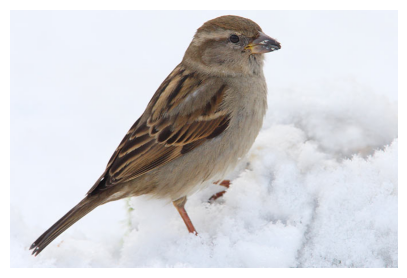

In [ ]:
sample_unknown = 'sparrow.jpeg'
img = PILImage.create(sample_unknown)
img.show();
classify(img)

{'canary': 0.004665081854909658,
 'magpie': 0.0006107735098339617,
 'mockingbird': 0.00046059853048063815,
 'nightingale': 0.008433900773525238,
 'robin': 0.9856374859809875,
 'tanager': 0.00019207783043384552}

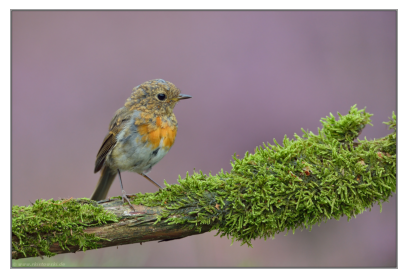

In [ ]:
sample_known = 'robin.jpeg'
img = PILImage.create(sample_known)
img.show()
classify(img)

In [ ]:
#| export
image = gr.inputs.Image(shape=(128,128))
label = gr.outputs.Label()
examples = ['sparrow.jpeg', 'robin.jpeg']

intf = gr.Interface(fn=classify, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

In [ ]:
import nbdev
nbdev.export.nb_export('Create_app_for_hs', '.')